## Importing all the libraries

In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np
import plotly.express as px 
import base64
from collections import Counter
import seaborn as sns

### Reading the dataset

In [2]:
df=pd.read_csv('git_stars.csv')
df.head()

,Name,Stars,Forks,Language,Description,URL,Domain,Growth Pattern
0,freeCodeCamp/freeCodeCamp,224136,8997,JavaScript,The https://freeCodeCamp.com open source codeb...,https://github.com/freeCodeCamp/freeCodeCamp,Documentation,NaN
1,twbs/bootstrap,105991,48185,JavaScript,"The most popular HTML, CSS, and JavaScript fra...",https://github.com/twbs/bootstrap,Web libraries and frameworks,NaN
2,d3/d3,59462,15847,JavaScript,"Bring data to life with SVG, Canvas and HTML. ...",https://github.com/d3/d3,Web libraries and frameworks,NaN
3,facebook/react,58176,10559,JavaScript,"A declarative, efficient, and flexible JavaScr...",https://github.com/facebook/react,Web libraries and frameworks,NaN
4,angular/angular.js,54439,27059,JavaScript,HTML enhanced for web apps,https://github.com/angular/angular.js,Web libraries and frameworks,NaN


In [3]:
df.describe()

,Stars,Forks
count,5000.000000,5000.000000
mean,4334.034000,858.789200
std,5586.010477,1945.167422
min,1596.000000,0.000000
25%,2085.000000,252.000000
50%,2866.000000,460.000000
75%,4541.250000,879.000000
max,224136.000000,88459.000000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Name            5000 non-null   object
 1   Stars           5000 non-null   int64 
 2   Forks           5000 non-null   int64 
 3   Language        5000 non-null   object
 4   Description     4958 non-null   object
 5   URL             5000 non-null   object
 6   Domain          5000 non-null   object
 7   Growth Pattern  3863 non-null   object
dtypes: int64(2), object(6)
memory usage: 312.6+ KB


In [5]:
df.columns

Index(['Name', 'Stars', 'Forks', 'Language', 'Description', 'URL', 'Domain',
       'Growth Pattern'],
      dtype='object')

### Repository with max Stars

In [6]:

df[df['Stars']==df['Stars'].max()]

,Name,Stars,Forks,Language,Description,URL,Domain,Growth Pattern
0,freeCodeCamp/freeCodeCamp,224136,8997,JavaScript,The https://freeCodeCamp.com open source codeb...,https://github.com/freeCodeCamp/freeCodeCamp,Documentation,NaN


### Top 20 languages Used in popular projects

In [7]:
df['Language'].value_counts()[:20]

JavaScript          1559
Java                 520
Python               441
Objective-C          374
Ruby                 305
Go                   212
HTML                 193
C                    183
PHP                  173
C++                  169
Swift                167
CSS                  149
Shell                107
C#                    63
CoffeeScript          57
VimL                  49
TypeScript            39
Scala                 36
Clojure               26
Jupyter Notebook      18
Name: Language, dtype: int64

#### Domain info

In [8]:
df['Domain'].value_counts()

Web libraries and frameworks        1535
Non-web libraries and frameworks    1439
Software tools                       972
Application software                 437
Documentation                        433
System software                      184
Name: Domain, dtype: int64

In [9]:
df2=df[['Forks','Stars','Language']]
group1=pd.DataFrame(df2.groupby( ['Language'],as_index=False).sum().sort_values('Stars',ascending=False))
group1[['Forks','Language']][:10]

,Forks,Language
30,1301010,JavaScript
29,573190,Java
54,342202,Python
43,244395,Objective-C
58,237554,Ruby
21,128903,Go
24,297321,HTML
7,197660,C++
5,167459,C
8,131585,CSS


#### Language with most Stars

In [10]:
fig=px.pie(group1[:10],values='Stars',names='Language',hole=0.3)
fig.update_layout(title="Language with most Stars")

fig.update_xaxes(title_font=dict(size=20))

fig.show()

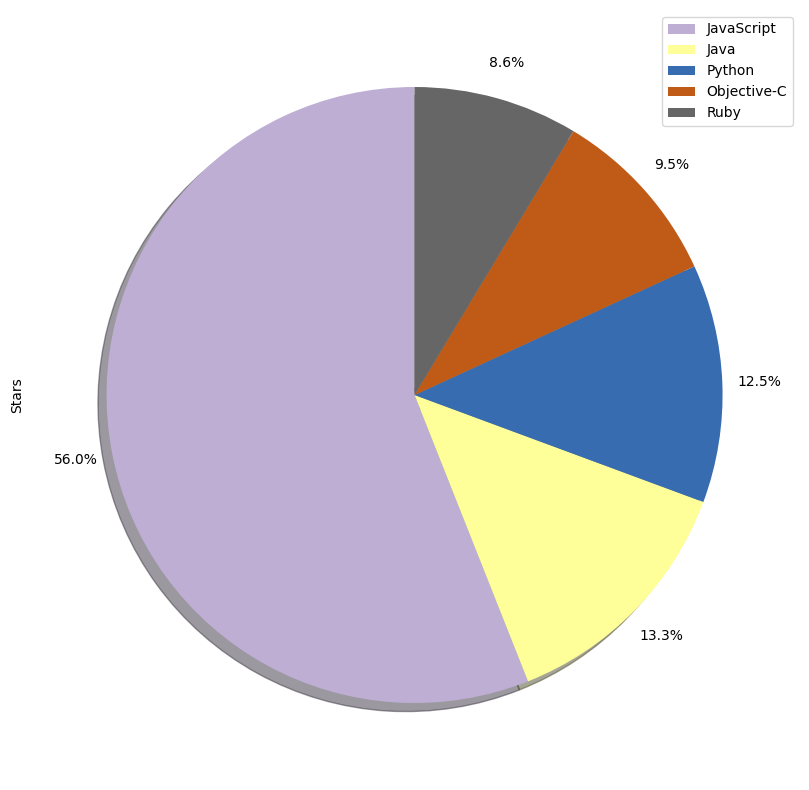

In [11]:
cmap=plt.cm.Accent
group1['Stars'][:5].plot(kind='pie',figsize=(20, 10),
            autopct='%1.1f%%', 
            startangle=90,    
            shadow=True,
            labels=None,                
            pctdistance=1.12,
            colors=cmap(np.linspace(0.2,1,len(group1[:5]))) 
            )
plt.legend(labels=group1['Language'][:10], loc='upper right')
plt.show()

#### Distribution of Stars according to project language

In [12]:
fig2=px.bar(group1[:10],x="Stars",y='Language',color='Language',text_auto='0.2s',orientation='h')
fig2.update_traces(textfont_size=12, textangle=0, textposition="outside", cliponaxis=False)
fig2.show()

Distribution of Forks according to Project language

In [13]:
filtered_group1=group1.sort_values('Forks',ascending=False)
fig2=px.bar(filtered_group1[:10],x="Forks",y='Language',color='Language',text_auto='0.2s',orientation='h')
fig2.update_traces(textfont_size=12, textangle=0, textposition="outside", cliponaxis=False)
fig2.show()

#### No of Projects on different Domains

In [14]:
domain_df=df['Domain'].value_counts().to_frame()
domain_df.reset_index(inplace=True)
domain_df.columns=['Domain','count']


In [15]:
fig4=px.pie(domain_df,values='count',names='Domain')
fig4.show()

No Stars on projects of Specific language in different Domains

In [16]:
domain_df_2=df[['Language','Domain','Stars','Forks']]
domain_group=domain_df_2.groupby(['Language','Domain'],as_index=False).sum()
domain_group.head()

,Language,Domain,Stars,Forks
0,ActionScript,Non-web libraries and frameworks,2063,875
1,ApacheConf,Application software,5628,599
2,ApacheConf,Documentation,8181,697
3,ApacheConf,Web libraries and frameworks,5755,1084
4,Assembly,Application software,4148,478


In [17]:
filtered_df=domain_group[domain_group['Language']=='Python']
fig5=px.bar(filtered_df,x='Domain',y='Stars')
fig5.show()

Use of Different Language in different Domains

In [18]:
filtered_df=df[['Domain','Language']]
pivot_df=pd.pivot_table(filtered_df,index='Domain',columns='Language',aggfunc=len)
pivot_df.replace(np.nan,0,inplace=True)

In [19]:

pivot_df.loc['total']=pivot_df.sum(axis=0)
pivot_df.sort_values('total',axis=1,ascending=False,inplace=True)
pivot_df_10=pivot_df.iloc[:,:10]

In [20]:
fig8=px.bar(pivot_df['JavaScript'])
fig8.show()

In [21]:
fig8=px.bar(pivot_df_10)
fig8.show()

Different Doamins used in Projects for Different Languages

In [68]:
fig9=px.bar(pivot_df_10.T)
fig9.show()

In [23]:
#domain language table

pivot_table = pd.pivot_table(df[['Domain','Language']], index='Domain', columns='Language', aggfunc=len)
pivot_table.reset_index()
pivot_table.replace(np.nan,0,inplace=True)
pivot_table.loc['total']=pivot_table.sum(axis=0)
pivot_table.sort_values('total',axis=1,ascending=False,inplace=True)

# Language max projects
language_max_projects=[]
for i in range(0,len(pivot_table)-1):
    language_max_projects.append(pivot_table.iloc[i][pivot_table.iloc[i]==pivot_table.iloc[i].max()])
most_project_per_domain=pd.DataFrame(language_max_projects)





coding Language with most number of Projects in different Domains

<Axes: >

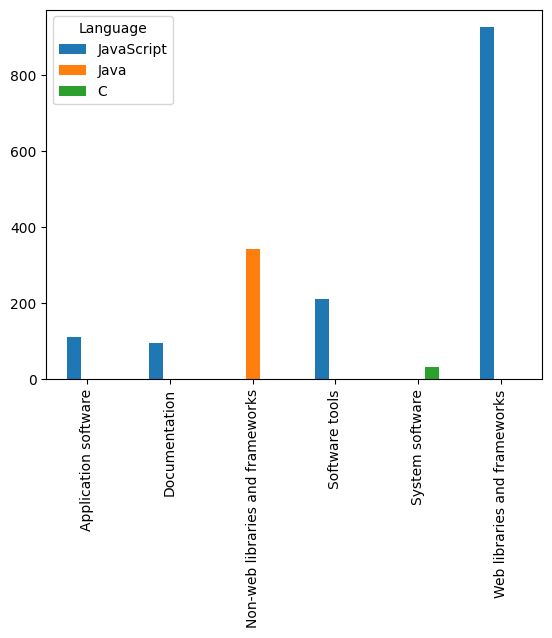

In [24]:
most_project_per_domain.plot.bar()

## Organisation with most number of popular projects

In [25]:
organisation=[]
for i in range(0,len(df)):
    text=df['Name'][i]
    words=text.split("/")
    organisation_name=words[0]
    organisation.append(organisation_name)

In [26]:
org_dict={}
for word in organisation:
    if word in org_dict:
        org_dict[word]+=1
    else:
        org_dict[word]=1
sorted_word_counts = sorted(org_dict.items(), key=lambda x: x[1], reverse=True)

# print the sorted word frequencies
for word, count in sorted_word_counts:
    print(f"{word}: {count}")

google: 57
facebook: 54
square: 22
twitter: 22
thoughtbot: 17
Microsoft: 16
alibaba: 15
Yalantis: 15
apache: 14
angular: 13
airbnb: 12
JakeWharton: 12
docker: 11
mozilla: 11
github: 11
tj: 11
Netflix: 11
kennethreitz: 10
HubSpot: 10
reactjs: 9
shadowsocks: 9
yahoo: 9
elastic: 8
vuejs: 7
Automattic: 7
etsy: 7
substack: 7
addyosmani: 7
FormidableLabs: 7
hashicorp: 7
googlesamples: 7
donnemartin: 7
gaearon: 7
Ramotion: 7
jquery: 6
hakimel: 6
angular-ui: 6
dotnet: 6
visionmedia: 6
nicklockwood: 6
sindresorhus: 6
facebookarchive: 6
GoogleChrome: 6
ryanb: 6
aws: 6
tensorflow: 5
h5bp: 5
rails: 5
antirez: 5
chrisbanes: 5
tpope: 5
ruanyf: 5
daimajia: 5
swagger-api: 5
dropbox: 5
fogleman: 5
ankane: 5
mattt: 5
fex-team: 5
acdlite: 5
shu223: 5
twbs: 4
apple: 4
nodejs: 4
socketio: 4
expressjs: 4
laravel: 4
jashkenas: 4
blueimp: 4
pallets: 4
ReactiveX: 4
typicode: 4
defunkt: 4
spf13: 4
mitchellh: 4
rstacruz: 4
feross: 4
coreos: 4
spring-projects: 4
chjj: 4
mongodb: 4
realm: 4
Flipboard: 4
ibireme: 4

In [27]:
df_org=pd.DataFrame(sorted_word_counts)
df_org.head()

,0,1
0,google,57
1,facebook,54
2,square,22
3,twitter,22
4,thoughtbot,17


In [72]:
fig_9=px.bar(df_org[:20],x=0,y=1,color_discrete_sequence =['crimson'])
fig_9.show()

## Relation between Stars and Forks 
### we have removed the 4 outliers

In [29]:
filtered_df=df[(df['Forks']<30000) & (df['Stars']<60000)]
fig10=px.scatter(filtered_df[filtered_df['Language']=='Python'],x='Stars',y='Forks',color='Language')
fig10.show()

In [30]:
filtered_df=df[(df['Forks']<30000) & (df['Stars']<60000)]
fig10=px.scatter(filtered_df,x='Stars',y='Forks',color='Language')
fig10.show()

In [70]:
filtered_df=df[(df['Forks']<30000) & (df['Stars']<60000)]
fig10=px.scatter(filtered_df,x='Stars',y='Forks',color='Domain',hover_name="Name", hover_data=["Name", "Stars"])
fig10.show()

In [31]:
df.head()

,Name,Stars,Forks,Language,Description,URL,Domain,Growth Pattern
0,freeCodeCamp/freeCodeCamp,224136,8997,JavaScript,The https://freeCodeCamp.com open source codeb...,https://github.com/freeCodeCamp/freeCodeCamp,Documentation,NaN
1,twbs/bootstrap,105991,48185,JavaScript,"The most popular HTML, CSS, and JavaScript fra...",https://github.com/twbs/bootstrap,Web libraries and frameworks,NaN
2,d3/d3,59462,15847,JavaScript,"Bring data to life with SVG, Canvas and HTML. ...",https://github.com/d3/d3,Web libraries and frameworks,NaN
3,facebook/react,58176,10559,JavaScript,"A declarative, efficient, and flexible JavaScr...",https://github.com/facebook/react,Web libraries and frameworks,NaN
4,angular/angular.js,54439,27059,JavaScript,HTML enhanced for web apps,https://github.com/angular/angular.js,Web libraries and frameworks,NaN


## Nlp

In [32]:
import numpy as np
import pandas as pd
import re
import spacy
import string


In [33]:
nlp = spacy.load("en_core_web_sm")


Cleaning the Description For NLP 

In [34]:
df['Description'].replace(np.nan,'',inplace=True)
df['clean_description']=""
for i in range(0, len(df)):
    doc=nlp(df['Description'][i])
    sentence = " "         # Iterating through the entire column and extracting the sentence...
    
    for word in doc:
        if word.is_stop == False:     # Tokenizing the sentence and removing the Stopwords...
            sentence = sentence + word.text + " "
    df['clean_description'][i] = sentence

C:\Users\soura\AppData\Local\Temp\ipykernel_7188\170753558.py:10: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [35]:
def clean_text(sentence):
    sentence = re.sub('\[.*?\]', '', sentence)
    sentence = re.sub('[ð]', '', sentence)
    sentence = re.sub('\w*[\d@]\w*', '', sentence)
    sentence = re.sub('[A-Za-z]+\d+|\d+[A-Za-z]+', '', sentence).strip()
    sentence = re.sub('https?://\S+|www\.\S+', '', sentence)
    sentence = re.sub('<.*?>+', '', sentence)
    sentence = re.sub('^RT[\s]+', '', sentence)
    sentence = re.sub('[%s]' % re.escape(string.punctuation), '', sentence)
    sentence = re.sub('\n', '', sentence)
    sentence = re.sub('\w*\d\w*', '', sentence)
    sentence = re.sub('\±\ð\$\%\&\@+\"\'\,', '', sentence)
    return sentence

for i, sentence in enumerate(df['clean_description']):
    clean = clean_text(sentence)
    df['clean_description'][i] = clean
    

C:\Users\soura\AppData\Local\Temp\ipykernel_7188\3522937333.py:17: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Word counts

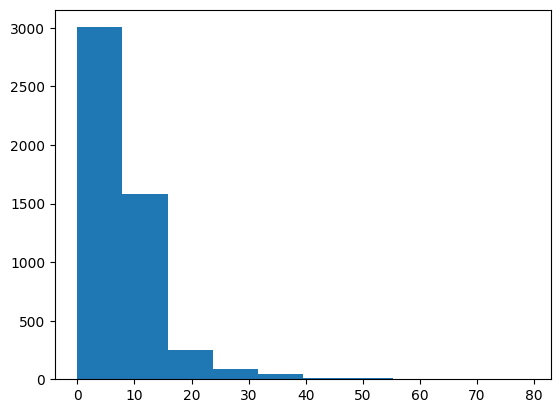

In [36]:
counts = []

for sentence in df['clean_description']:
    sentence = nlp(sentence)
    word_count = len(sentence)
    counts.append(word_count)

plt.hist(counts)
plt.show()

Describing the description Column

In [37]:
total_num_words = sum(counts) # total number of words
average_sentence_length = np.mean(counts) # print everage sentence length

word_lengths = []
for sentence in df['clean_description']:
    sentence = nlp(sentence)
    for word in sentence:
        length = len(word)
        word_lengths.append(length)

average_word_length = np.mean(word_lengths) # print everage word length

print(f'Total number of words in the dataset: {total_num_words} words.')
print(f'Average length of words in the dataset: {average_word_length} characters.')
print(f'Average length of sentences in the dataset: {average_sentence_length} words.')

Total number of words in the dataset: 40312 words.
Average length of words in the dataset: 5.818565191506251 characters.
Average length of sentences in the dataset: 8.0624 words.


In [38]:
all_words = []

for sentence in df['clean_description']:
    words = nlp(sentence)
    for word in words:
        all_words.append(word.text)

print(all_words[:100])

[' ', 'open', 'source', 'codebase', 'curriculum', ' ', 'Learn', 'code', 'help', 'nonprofits', 'popular', 'HTML', ' ', 'CSS', ' ', 'JavaScript', 'framework', 'developing', 'responsive', ' ', 'mobile', 'projects', 'web', 'Bring', 'data', 'life', 'SVG', ' ', 'Canvas', 'HTML', '  ', 'barchartchartwithupwardstrendtada', 'declarative', ' ', 'efficient', ' ', 'flexible', 'JavaScript', 'library', 'building', 'user', 'interfaces', 'HTML', 'enhanced', 'web', 'apps', 'book', 'series', 'JavaScript', '  ', 'twitter', 'delightful', 'community', ' ', 'driven', '   ', 'contributors', ' ', 'framework', 'managing', 'zsh', 'configuration', ' ', 'Includes', '  ', 'optional', 'plugins', ' ', 'rails', ' ', 'git', ' ', 'OSX', ' ', 'hub', ' ', 'capistrano', ' ', 'brew', ' ', 'ant', ' ', 'php', ' ', 'python', ' ', 'etc', '   ', 'themes', 'spice', 'morning', ' ', 'auto', ' ', 'update', 'tool', 'makes', 'easy', 'latest', 'updates']


In [39]:
most_common = Counter(all_words).most_common(20)
print(most_common)

[(' ', 5710), ('library', 416), ('  ', 402), ('JavaScript', 314), ('Android', 281), ('framework', 266), ('iOS', 257), ('web', 237), ('based', 199), ('source', 167), ('simple', 154), ('Python', 145), ('code', 142), ('data', 139), ('CSS', 131), ('   ', 125), ('jQuery', 125), ('API', 125), ('open', 124), ('app', 123)]


<Axes: >

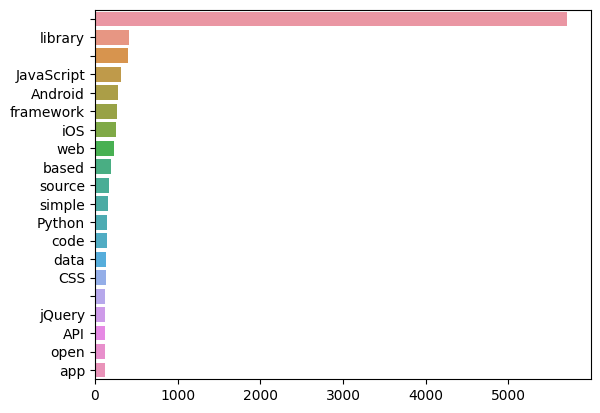

In [40]:
words, frequency = [], []
for word, count in most_common:
    words.append(word)
    frequency.append(count)
    
sns.barplot(x = frequency, y = words)

Since Most_common words contain upper and lower so we will lower all the words and remove words with less than 3 letters

In [41]:
all_words_clean = []

for sentence in df['clean_description']:
    words = nlp(sentence)
    for word in words:
        word = word.text.lower() # lowercase all word
        if len(word) >= 3: # quick solution to get rif of contractions
            # find better solution in official version
            all_words_clean.append(word)

print(all_words_clean[:100])

['open', 'source', 'codebase', 'curriculum', 'learn', 'code', 'help', 'nonprofits', 'popular', 'html', 'css', 'javascript', 'framework', 'developing', 'responsive', 'mobile', 'projects', 'web', 'bring', 'data', 'life', 'svg', 'canvas', 'html', 'barchartchartwithupwardstrendtada', 'declarative', 'efficient', 'flexible', 'javascript', 'library', 'building', 'user', 'interfaces', 'html', 'enhanced', 'web', 'apps', 'book', 'series', 'javascript', 'twitter', 'delightful', 'community', 'driven', '   ', 'contributors', 'framework', 'managing', 'zsh', 'configuration', 'includes', 'optional', 'plugins', 'rails', 'git', 'osx', 'hub', 'capistrano', 'brew', 'ant', 'php', 'python', 'etc', '   ', 'themes', 'spice', 'morning', 'auto', 'update', 'tool', 'makes', 'easy', 'latest', 'updates', 'community', 'iconic', 'font', 'css', 'toolkit', 'javascript', 'style', 'guide', 'computation', 'data', 'flow', 'graphs', 'scalable', 'machine', 'learning', 'framework', 'building', 'native', 'apps', 'react', 'jque

In [42]:

most_common2 = Counter(all_words_clean).most_common(20)
print(most_common2)

[('library', 463), ('javascript', 433), ('framework', 349), ('web', 331), ('android', 312), ('ios', 259), ('simple', 220), ('source', 218), ('based', 210), ('open', 185), ('code', 175), ('data', 171), ('app', 168), ('python', 163), ('nodejs', 162), ('easy', 147), ('plugin', 141), ('css', 140), ('fast', 140), ('apps', 138)]


<Axes: >

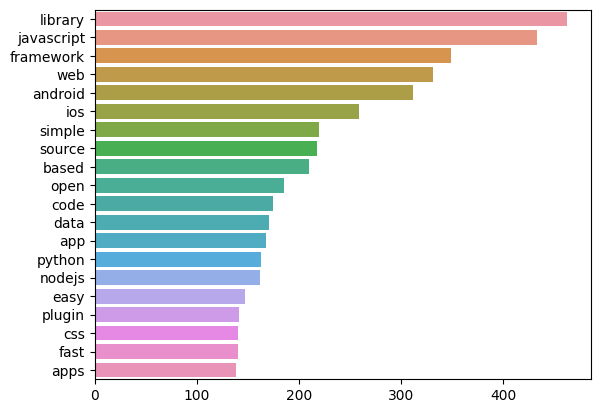

In [43]:
words, frequency = [], []
for word, count in most_common2:
    words.append(word)
    frequency.append(count)
    
sns.barplot(x = frequency, y = words)

creating the word cloud of the description data 

In [65]:
fig=px.pie(group1[:10],names='Language',values='Stars')
fig.show()

In [64]:
tree_fig=px.treemap(df,path=['Domain','Language'],color='Language',color_continuous_scale='RdGr',title='Flight count by airline to destination state')
tree_fig.show()

In [55]:
names=[column  for column in pivot_df.columns]

['Application software',
 'Documentation',
 'Non-web libraries and frameworks',
 'Software tools',
 'System software',
 'Web libraries and frameworks',
 'total']

In [44]:
df['Language'].unique()[:10]

array(['JavaScript', 'Shell', 'HTML', 'C++', 'C', 'Go', 'CSS', 'Ruby',
       'CoffeeScript', 'PHP'], dtype=object)

In [76]:
def org_df(df):
    organisation=[]
    for i in range(0,len(df)):
        text=df['Name'][i]
        words=text.split("/")
        organisation_name=words[0]
        organisation.append(organisation_name)
    most_common = Counter(organisation).most_common(20)
    most_common_df=pd.DataFrame(most_common)
    most_common_df.reset_index()
    most_common_df.columns=['Organisation','repository']
    return most_common_df

In [77]:
org=org_df(df)

In [89]:
fig=px.bar(group1[:10],x="Stars",y='Language',color='Language',text_auto='0.2s',orientation='h')
fig.update_traces(textfont_size=12, textangle=0, textposition="outside", cliponaxis=False)
fig.show()

In [87]:
df2=df[['Forks','Stars','Language','Domain']]
group1=pd.DataFrame(df2.groupby( ['Language'],as_index=False).sum().sort_values('Stars',ascending=False))

C:\Users\soura\AppData\Local\Temp\ipykernel_7188\1170926174.py:2: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



In [86]:
df.head()

,Name,Stars,Forks,Language,Description,URL,Domain,Growth Pattern,clean_description
0,freeCodeCamp/freeCodeCamp,224136,8997,JavaScript,The https://freeCodeCamp.com open source codeb...,https://github.com/freeCodeCamp/freeCodeCamp,Documentation,NaN,open source codebase curriculum Learn code h...
1,twbs/bootstrap,105991,48185,JavaScript,"The most popular HTML, CSS, and JavaScript fra...",https://github.com/twbs/bootstrap,Web libraries and frameworks,NaN,popular HTML CSS JavaScript framework develo...
2,d3/d3,59462,15847,JavaScript,"Bring data to life with SVG, Canvas and HTML. ...",https://github.com/d3/d3,Web libraries and frameworks,NaN,Bring data life SVG Canvas HTML barchartcha...
3,facebook/react,58176,10559,JavaScript,"A declarative, efficient, and flexible JavaScr...",https://github.com/facebook/react,Web libraries and frameworks,NaN,declarative efficient flexible JavaScript li...
4,angular/angular.js,54439,27059,JavaScript,HTML enhanced for web apps,https://github.com/angular/angular.js,Web libraries and frameworks,NaN,HTML enhanced web apps


In [88]:
group1

,Language,Forks,Stars
30,JavaScript,1301010,7861101
29,Java,573190,1873569
54,Python,342202,1755385
43,Objective-C,244395,1335479
58,Ruby,237554,1210719
...,...,...,...
34,LLVM,978,1785
48,POV-Ray SDL,491,1751
57,Racket,323,1745
4,Bro,460,1732


In [91]:
pivot_df.T[:10]

Domain,Application software,Documentation,Non-web libraries and frameworks,Software tools,System software,Web libraries and frameworks,total
Language,,,,,,,
JavaScript,110.0,94.0,203.0,211.0,14.0,927.0,1559.0
Java,30.0,48.0,342.0,49.0,26.0,25.0,520.0
Python,66.0,46.0,132.0,136.0,10.0,51.0,441.0
Objective-C,33.0,14.0,266.0,44.0,5.0,12.0,374.0
Ruby,21.0,24.0,87.0,85.0,5.0,83.0,305.0
Go,9.0,9.0,43.0,90.0,31.0,30.0,212.0
HTML,8.0,56.0,8.0,16.0,1.0,104.0,193.0
C,28.0,10.0,53.0,49.0,32.0,11.0,183.0
PHP,31.0,13.0,24.0,28.0,1.0,76.0,173.0


In [94]:
fig=px.bar(pivot_df[:10],title='No of Repository count accross Languages')
fig.show()

In [102]:
pivot_df[:-1]

Language,JavaScript,Java,Python,Objective-C,Ruby,Go,HTML,C,PHP,C++,...,Groff,Hack,IDL,Julia,Kotlin,LLVM,NSIS,Nimrod,PLpgSQL,XSLT
Domain,,,,,,,,,,,,,,,,,,,,,
Application software,110.0,30.0,66.0,33.0,21.0,9.0,8.0,28.0,31.0,21.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Documentation,94.0,48.0,46.0,14.0,24.0,9.0,56.0,10.0,13.0,6.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
Non-web libraries and frameworks,203.0,342.0,132.0,266.0,87.0,43.0,8.0,53.0,24.0,70.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
Software tools,211.0,49.0,136.0,44.0,85.0,90.0,16.0,49.0,28.0,38.0,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
System software,14.0,26.0,10.0,5.0,5.0,31.0,1.0,32.0,1.0,25.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
Web libraries and frameworks,927.0,25.0,51.0,12.0,83.0,30.0,104.0,11.0,76.0,9.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
